In [25]:
import os
from os.path import isdir, join
from pathlib import Path
#import pandas as pd


частоту с максимальной амплитудой +- два раза

In [26]:
# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import  
import scipy as sp

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import IPython.display as ipd

SyntaxError: invalid syntax (<ipython-input-26-aa00c398b1de>, line 5)

In [27]:
os.getcwd()

'C:\\Users\\IQ-6\\Documents\\распознование речи'

In [28]:
#train_audio_path = '../input/train/audio/'
filename = 'cat_s1.wav'
sample_rate, samples = wavfile.read(filename)
samples


array([ 0,  0,  0, ..., 37, 18,  6], dtype=int16)

In [32]:
samples.shape

(23520,)

Text(0, 0.5, 'Амплитуды')

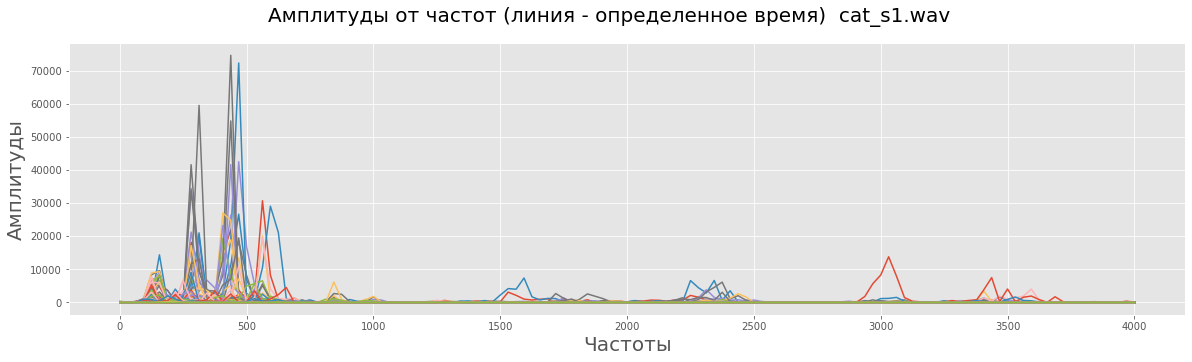

In [29]:
plt.rcParams["figure.figsize"] = (20,5)
sn = ' '.join(['Амплитуды от частот (линия - определенное время) ',  filename])
plt.suptitle(sn, fontsize=20)
dots2 = plt.plot(signal.spectrogram(samples, sample_rate)[0], signal.spectrogram(samples, sample_rate)[2])
plt.xlabel('Частоты', fontsize=20)
plt.ylabel('Амплитуды', fontsize=20)

Text(0.5, 0, 'Время')

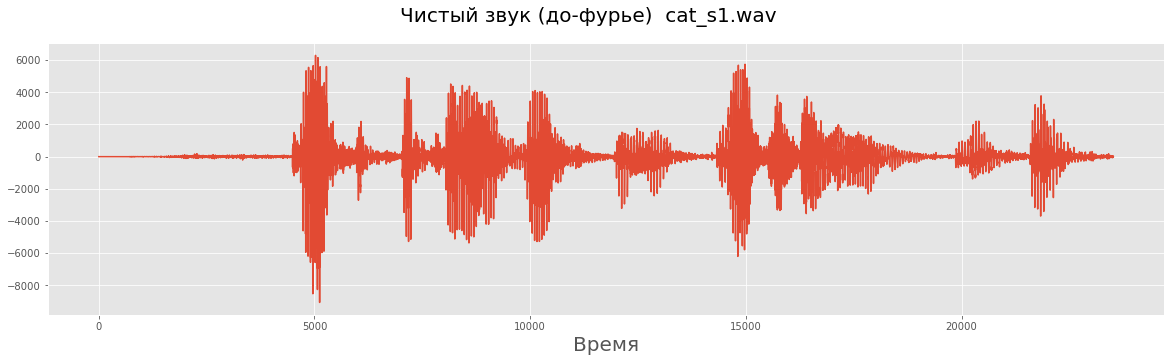

In [30]:
sn = ' '.join(['Чистый звук (до-фурье) ',  filename])
plt.suptitle(sn, fontsize=20)
plt.rcParams["figure.figsize"] = (20,5)
dots = plt.plot(range(len(samples)), samples)
plt.xlabel('Время', fontsize=20)

In [31]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Text(0.5, 0, 'Секунды')

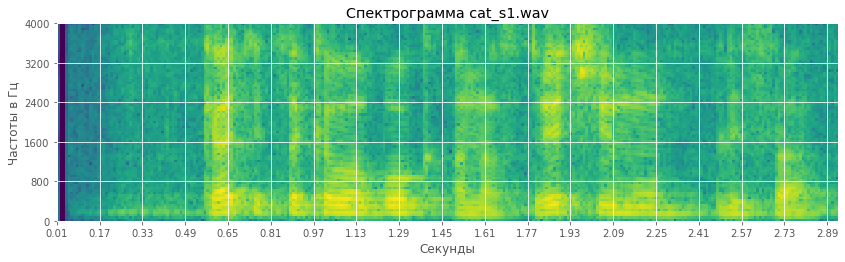

In [20]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))


ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Спектрограмма ' + filename)
ax2.set_ylabel('Частоты в Гц')
ax2.set_xlabel('Секунды')
